# Ch4 NumPy的實務應用

## 4-1 資料的正規化（Normalization）

In [20]:
import numpy as np

def zscore(x, axis = None):
    xmean = x.mean(axis = axis, keepdims = True) # keepdims要是True，不然會有無法擴張的問題
    # print("標準差:", xmean)
    xstd = x.std(axis = axis, keepdims = True)
    zscore = (x - xmean) / xstd
    return zscore

a = np.random.randint(10, size = (2, 5))
print(a)
print(zscore(a))
print((a[0][0] - np.mean(a)) / np.std(a))
print("-----")
print(zscore(a, axis = 1))
print((a[0][0] - np.mean(a, axis = 1)[0]) / np.std(a, axis = 1)[0])
print((a[1][0] - np.mean(a, axis = 1)[1]) / np.std(a, axis = 1)[1])
# np.std(a, axis = 1)

[[1 2 7 6 1]
 [8 6 8 3 1]]
[[-1.16599767 -0.81266504  0.95399809  0.60066547 -1.16599767]
 [ 1.30733072  0.60066547  1.30733072 -0.45933241 -1.16599767]]
-1.165997668006996
-----
[[-0.93138063 -0.54330537  1.39707095  1.00899568 -0.93138063]
 [ 1.00514142  0.28718326  1.00514142 -0.78975397 -1.50771213]]
-0.9313806308475994
1.0051414220648334


In [28]:
import numpy as np

def min_max(x, axis = None):
    min = x.min(axis = axis, keepdims = True)
    max = x.max(axis = axis, keepdims = True)
    result = (x - min) / (max - min)
    return result

b = np.random.randint(10, size = (2, 5))
print(b)
c = min_max(b)
print(c)
print(b.min(keepdims = True))
print((b[0][0] - b.min()) / (b.max() - b.min()))
print("-----")
d = min_max(b, axis = 1)
print(d)

[[7 3 7 1 6]
 [8 1 3 7 1]]
[[0.85714286 0.28571429 0.85714286 0.         0.71428571]
 [1.         0.         0.28571429 0.85714286 0.        ]]
[[1]]
0.8571428571428571
-----
[[1.         0.33333333 1.         0.         0.83333333]
 [1.         0.         0.28571429 0.85714286 0.        ]]


## 4-2 迴歸分析實作

In [52]:
np.sin(np.pi / 2)

1.0

In [53]:
import numpy as np

np.random.seed(7)
x = np.random.rand(20) * 8 - 4
print(x)
y = np.sin(x) + np.random.rand(20) * 0.2
y

[-3.38953369e+00  2.23935034e+00 -4.92726148e-01  1.78772142e+00
  3.82391610e+00  3.07966963e-01  8.96370928e-03 -3.42359093e+00
 -1.85248816e+00 -9.39993396e-04  1.43383997e+00  2.42991229e+00
 -9.52470935e-01 -3.47250922e+00 -1.69483521e+00  3.27674822e+00
 -2.29291717e+00 -3.83008305e-01  3.44964816e+00 -3.80080618e+00]


array([ 0.36551826,  0.97474469, -0.42696893,  1.08626185, -0.4487723 ,
        0.32975577,  0.11364611,  0.42835752, -0.82678387,  0.09261058,
        1.03160595,  0.75126035, -0.74037338,  0.42039024, -0.91913896,
        0.03283914, -0.59667609, -0.31091356, -0.18868119,  0.66770516])

In [54]:
omega = np.polyfit(x, y, 1)
omega

array([0.03750028, 0.09744021])

 
0.0375 x + 0.09744


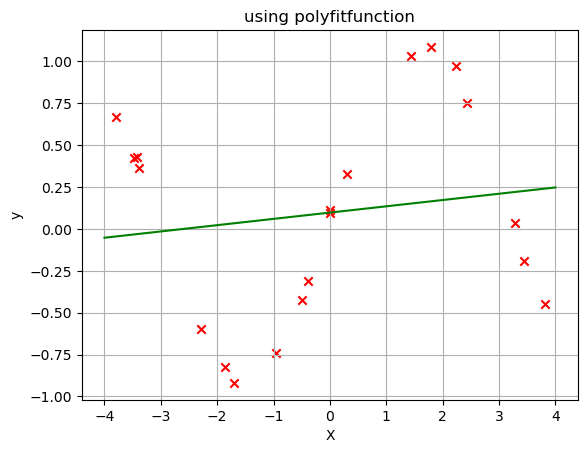

In [67]:
f = np.poly1d(omega)
print(f)

import matplotlib.pyplot as plt

plt.xlabel("X")
plt.ylabel("y")
plt.title("using polyfitfunction")
plt.grid(True) # 有沒有True都可以
plt.scatter(x, y, marker = "x", c = "red")
xx = np.linspace(-4, 4, 100)
plt.plot(xx, f(xx), color = "green")
plt.show()

## 4-3 機器學習實戰（一）：使用神經網路替鳶尾花分類

In [25]:
import numpy as np
import pandas as pd

df = pd.read_csv("iris.data", header = None) # header可以設定不要讓第一筆資料變表頭

df


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
x = df.iloc[0: 100, 0: 4].values
x
# x.shape

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:

y = df.iloc[0: 100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [28]:
y = np.where(y == "Iris-setosa", 0, 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
x_train = np.empty((80, 4))
x_test = np.empty((20, 4))
y_train = np.empty((80))
y_test = np.empty((20))

x_train[: 40], x_train[40: ] = x[: 40], x[50: 90]
x_test[: 10], x_test[10: ] = x[40: 50], x[90: 100]
y_train[:40], y_train[40: ] = y[: 40], y[50: 90]
y_test[: 10], y_test[10: ] = y[40: 50], y[90: 100]

In [76]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def activation(x, w, b):
    return sigmoid(np.dot(x, w) + b) # 不是用*，不然會Element wise

def update(x_train, y_train, w, b, eta):
    y_pred = activation(x_train, w, b)
    a = (y_pred - y_train) * y_pred * (1 - y_pred)
    for i in range(4):
        w[i] = w[i] - eta * 1 / float(len(y_train)) * np.sum(a * x_train[:, i])

    b = b - eta * 1 / float(len(y_train)) * np.sum(a * 1)
    return w, b

In [63]:
a = np.array([1, 2, 3])
b = np.array([2, 4, 6])
np.dot(a, b)
# 兩個1D的點積會是一個數值
# *則是Element wise

28

In [77]:
weights = np.ones(4) / 10
bias = np.ones(1) / 10
for _ in range(999):
    weights, bias = update(x_train, y_train, weights, bias, eta = 0.1)

print("weights = ", weights, "bias = ", bias)

weights =  [-0.32321875 -1.0269402   1.59194442  0.77334988] bias =  [-0.11241777]


In [67]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [68]:
activation(x_test, weights, bias)

array([0.44595993, 0.47753901, 0.45688815, 0.47192599, 0.47148764,
       0.46384506, 0.44928464, 0.45888749, 0.44357864, 0.45110535,
       0.63964646, 0.64015756, 0.61722515, 0.59404283, 0.63082105,
       0.6201559 , 0.62564763, 0.62345463, 0.57805183, 0.6229539 ])

In [71]:
activation(x_test, weights, bias)

array([0.21097801, 0.33008082, 0.24483122, 0.27116734, 0.26944543,
       0.27018321, 0.21590385, 0.25215574, 0.20579626, 0.23203148,
       0.82802088, 0.82010341, 0.77456811, 0.71451728, 0.80300035,
       0.77177799, 0.78592728, 0.78424043, 0.6535716 , 0.78118891])

In [78]:
activation(x_test, weights, bias)

array([0.04647418, 0.16419619, 0.06935813, 0.09016014, 0.08873561,
       0.09246002, 0.0491993 , 0.07571526, 0.04383201, 0.06099539,
       0.96683106, 0.96233971, 0.93330901, 0.87394427, 0.95240851,
       0.92947162, 0.9403989 , 0.9402634 , 0.7855545 , 0.9371522 ])

## 4-4 機器學習實戰（二）：使用神經網路辨識手寫數字圖片

In [99]:
import load_mnist as lm

dataset = lm.load_mnist()
dataset

{'x_train': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'y_train': array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 'x_test': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'y_test': array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0.,

In [91]:
dataset["x_train"][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [92]:
dataset["y_train"][0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [96]:
print((dataset["x_train"][0] * 255).reshape((28, 28)))

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

In [114]:
a = np.arange(15).reshape(5, 3)
print(a)
a[[0, 2, 4], :]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


array([[ 0,  1,  2],
       [ 6,  7,  8],
       [12, 13, 14]])

In [119]:
dataset["y_test"][0: 10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [122]:
import numpy as np
import neuralnet as nl
import load_mnist as lm

np.random.seed(21)

dataset = lm.load_mnist()
# print(dataset)

x_train = dataset["x_train"]
y_train = dataset["y_train"]
x_test = dataset["x_test"]
y_test = dataset["y_test"]

w_list, b_list = nl.make_params([784, 100, 10])

for epoch in range(100): # 改訓練週期（epoch）
    ra = np.random.randint(60000, size = 60000)
    for i in range(60):
        x_batch = x_train[ra[i * 1000: (i + 1) * 1000], :]
        y_batch = y_train[ra[i * 1000: (i + 1) * 1000], :]
        w_list, b_list = nl.update(x_batch, w_list, b_list, y_batch, eta = 2.0)

# 驗證成效
val_dict = nl.calcuate(x_test, w_list, b_list)
print(val_dict["y_2"][0: 10].round(2))

[[0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.01 0.   0.87 0.04 0.   0.   0.06 0.   0.01 0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.97 0.   0.   0.   0.   0.02 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.97 0.   0.   0.   0.   0.02]
 [0.   0.   0.   0.   0.23 0.   0.   0.   0.   0.77]
 [0.07 0.01 0.09 0.01 0.01 0.3  0.36 0.   0.11 0.02]
 [0.   0.   0.   0.   0.02 0.   0.   0.02 0.   0.95]]


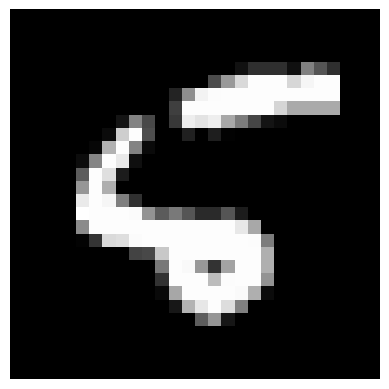

In [131]:
import matplotlib.pyplot as plt

plt.imshow(dataset["x_test"][8].reshape((28, 28)), cmap = "gray")
plt.axis("off")
plt.show()

## 4-5 使用NumPy實作強化學習

In [149]:
import gym

env = gym.make("CartPole-v1", render_mode = "rgb_array") # v0已經過時了
observation = env.reset()
print(observation)
action = 1
env.step(action) # 第二個False是指是否成功
# 這可能取決於您的具體情況。
# 在某些情況下，環境可能會提供一個額外的標誌，指示代理是否成功完成了任務。

(array([ 0.02996406, -0.0175383 , -0.02103301, -0.02219946], dtype=float32), {})


c:\Users\Vick\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(array([ 0.02961329,  0.17787887, -0.021477  , -0.32144365], dtype=float32),
 1.0,
 False,
 False,
 {})

In [152]:
observation, reward, fail, success, info = env.step(action)
env.render()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [10]:
import gym
import numpy as np

env = gym.make("CartPole-v1")
observation = env.reset()

for k in range(100):
    env.render()
    action = np.random.randint(2)
    observation, reward, fail, success, info = env.step(action)

env.close()

In [19]:
print(np.linspace(-2.4, 2.4, 4 + 1))
bins = np.linspace(-2.4, 2.4, 4 + 1)[1: -1]
print(bins)
print(np.digitize(-2, bins))
print(np.digitize(-1, bins))
print(np.digitize(0.6, bins))
print(np.digitize(1.5, bins))

[-2.4 -1.2  0.   1.2  2.4]
[-1.2  0.   1.2]
0
1
2
3


In [36]:
q_table = np.random.uniform(low = -1, high = 1, size = (4 ** 4, env.action_space.n))
# q_table

def bins(clip_min, clip_max, num):
    return np.linspace(clip_min, clip_max, num + 1)[1: -1]

def digitize_state(observation):
    cart_pos, cart_v, pole_angle, pole_v = observation

    digitized = [np.digitize(cart_pos, bins = bins(-2.4, 2.4, 4)), # bins(-2.4, 2.4, 4) # 首尾去掉並變成4個區間
                 np.digitize(cart_v, bins = bins(-3.0, 3.0, 4)), 
                 np.digitize(pole_angle, bins = bins(-0.5, 0.5, 4)), 
                 np.digitize(pole_v, bins = bins(-2.0, 2.0, 4))]

    return sum([x * (4 ** i) for i, x in enumerate(digitized)]) 
    # print(digitized)

# print(env.reset()[0])
digitize_state(env.reset()[0])

154

In [44]:
a = np.zeros(5)
print(np.argmax(a))
a[0] = 5
print(a)
a.mean()

0
[5. 0. 0. 0. 0.]


1.0

In [52]:
b = np.zeros(5)
print(b)
for _ in range(5):
    b = np.hstack((b[1: ], [5]))
    print(b)


[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 5.]
[0. 0. 0. 5. 5.]
[0. 0. 5. 5. 5.]
[0. 5. 5. 5. 5.]
[5. 5. 5. 5. 5.]


In [55]:
for _ in range(5):
    print(np.random.choice([0, 1]))

0
0
0
1
0


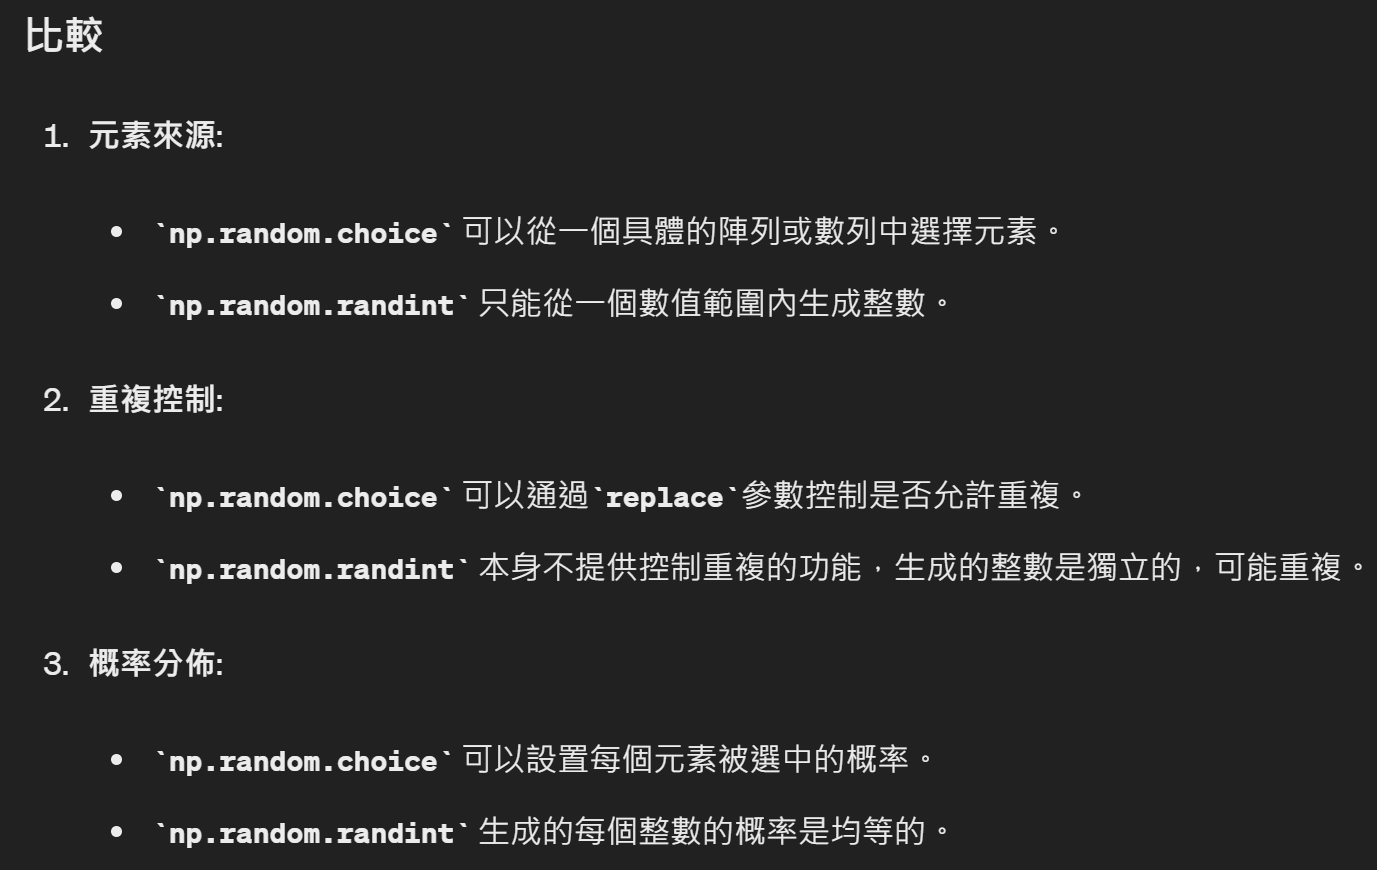

In [56]:
np.random.normal(size = (10, 4))

array([[ 1.01227232,  0.72459172,  1.0133588 ,  0.09488468],
       [-0.05738447, -0.28332563, -0.21215356,  0.28077441],
       [-1.39732593, -0.94890953,  0.49328893,  0.47514472],
       [ 1.57383943, -0.19626245, -0.65452418, -0.45307349],
       [-1.00200403, -2.39997065, -0.86381826,  0.10885926],
       [-0.39897734,  1.16724807, -0.23230697,  1.09860478],
       [ 1.35224756, -0.07685266, -0.25607596, -0.4174334 ],
       [-0.52207188,  0.94101984,  1.13252582,  1.14955242],
       [ 1.41857393, -1.38787804, -1.40686082, -0.4605624 ],
       [-0.15109744,  1.03264475,  1.32106919, -1.22328129]])